Metric 2 - Biggest and most populus neighborhood

What is the best neighbourhood for a pigeon to live in?
Well, the biggest one. More space, more garbage to pick at.
But, since we now know that pigeons are actually surveilance drones, the ones with the most people in them.

Therefore, the most populus and biggest by size.

First, let's load the tools we need, and the first data file, the Neighborhoods.

In [79]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
biggest_hood = pd.read_csv("neighborhoods.csv")
biggest_hood.head(1)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,globalid,created_user,created_date,last_edited_user,last_edited_date,temp,shape_area,shape_length
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,15,Ose Akinlotan,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:13,NaN,8.153647e+06,14047.065024


Let's strip out the data we dont need. To decide what we need, let's look at all the column names.

In [50]:
for col in biggest_hood.columns:
    print(col)

objectid
fid_blockg
statefp10
countyfp10
tractce10
blkgrpce10
geoid10
namelsad10
mtfcc10
funcstat10
aland10
awater10
intptlat10
intptlon10
shape_leng
fid_neighb
pghdb_sde_neighborhood_2010_area
perimeter
neighbor
neighbor_i
hood
hood_no
acres
sqmiles
dpwdiv
unique_id
sectors
shape_le_1
shape_ar_1
page_number
plannerassign
globalid
created_user
created_date
last_edited_user
last_edited_date
temp
shape_area
shape_length


The data we are interested in is the "hood" and the "acres" colums. So lets filter these out, and look at the first 5 entries.

In [13]:
hoods.loc[:,["hood","acres"]].head(5)

,hood,acres
0,Point Breeze North,183.781
1,Squirrel Hill North,785.948
2,Garfield,294.077
3,Bedford Dwellings,115.252
4,Knoxville,193.982


We only need the top 5, so let's sort it, descending, then slice the rest of the rows out.

In [15]:
hoods.loc[:,["hood","acres"]].sort_values(by=["acres"], ascending=False).head(5)

,hood,acres
80,Squirrel Hill South,1717.485
24,Brookline,1338.669
25,Hays,1125.478
51,Carrick,1075.670
60,Hazelwood,1017.805


Save the results into a mask, so we can visualize it better.

In [17]:
hood_acres=hoods.loc[:,["hood","acres"]].sort_values(by=["acres"], ascending=False).head(5)
hood_acres

,hood,acres
80,Squirrel Hill South,1717.485
24,Brookline,1338.669
25,Hays,1125.478
51,Carrick,1075.670
60,Hazelwood,1017.805


A bar chart will be perfect for this.

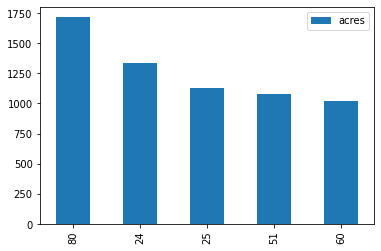

In [61]:
hood_acres.plot(kind='bar')

In [ ]:
After a little tailoring, we have a pretty chart!

Text(0, 0.5, 'Size in acres')

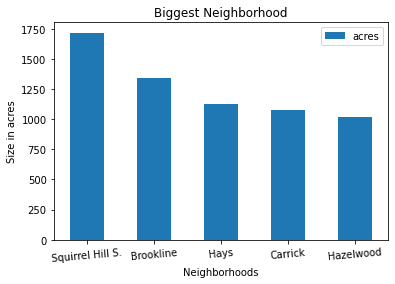

In [67]:
plotdata =pd.DataFrame({"acres":[1717.485, 1338.669, 1125.478, 1075.670, 1017.805]}, index=["Squirrel Hill S.", "Brookline", "Hays", "Carrick", "Hazelwood"])
plotdata.plot.bar(rot=5)
plt.title("Biggest Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Size in acres")

Next, let's repeat the same steps to find the most populus neighbourhood. 

In [53]:
populous_hood = pd.read_csv("census.csv")
populous_hood.head(5)

,Neighborhood,Sector #,Population (2010),Miles of Major Roads,Total Street Miles,Street Density (st. mi/area sq. mi),# Sets of Steps,# Step Treads,Res. Permit Parking Area(s),Total Working Pop. (Age 16+) (2010),Commute to Work: Drive Alone (2010),Commute to Work: Carpool/Vanpool (2010),Commute to Work: Public Transportation (2010),Commute to Work: Taxi (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010),Work at Home (2010)
0,Allegheny Center,3,933,2.232425,4.141467,19.721273,0,0,None,386,0.277202,0.098446,0.168394,0.000000,0.000000,0.0,0.437824,0.000000,0.018135
1,Allegheny West,3,462,1.471627,4.870843,34.544983,0,0,G,151,0.231788,0.205298,0.158940,0.145695,0.000000,0.0,0.258278,0.000000,0.000000
2,Allentown,6,2500,1.648451,12.325689,41.781996,12,474,None,824,0.469660,0.109223,0.379854,0.000000,0.008495,0.0,0.000000,0.014563,0.018204
3,Arlington,7,1869,0.861571,10.734269,22.838871,13,428,None,673,0.739970,0.072808,0.135215,0.000000,0.000000,0.0,0.019316,0.008915,0.023774
4,Arlington Heights,7,244,0.000000,1.086460,8.230760,0,0,None,72,0.111111,0.000000,0.888889,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [52]:
# a different way to check the column names
populous_hood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Neighborhood                                   90 non-null     object 
 1   Sector #                                       90 non-null     int64  
 2   Population (2010)                              90 non-null     int64  
 3   Miles of Major Roads                           90 non-null     float64
 4   Total Street Miles                             90 non-null     float64
 5   Street Density (st. mi/area sq. mi)            90 non-null     float64
 6   # Sets of Steps                                90 non-null     int64  
 7   # Step Treads                                  90 non-null     int64  
 8   Res. Permit Parking Area(s)                    90 non-null     object 
 9   Total Working Pop. (Age 16+) (2010)            90 non-nu

In [55]:
populous_hood.loc[:,["Neighborhood","Population (2010)"]].head(5)

,Neighborhood,Population (2010)
0,Allegheny Center,933
1,Allegheny West,462
2,Allentown,2500
3,Arlington,1869
4,Arlington Heights,244


In [58]:
most_populous_hood=populous_hood.loc[:,["Neighborhood","Population (2010)"]].sort_values(by=["Population (2010)"], ascending=False).head(5)
most_populous_hood

,Neighborhood,Population (2010)
76,Squirrel Hill South,15110
67,Shadyside,13915
13,Brookline,13214
75,Squirrel Hill North,11363
55,North Oakland,10551


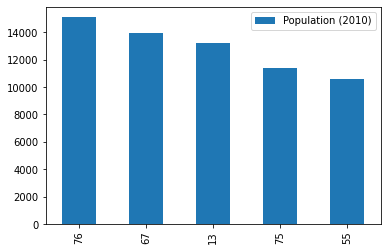

In [62]:
most_populous_hood.plot(kind='bar')

Text(0, 0.5, 'Population')

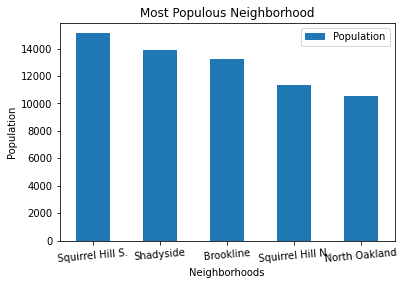

In [64]:
plotdata2 =pd.DataFrame({"Population":[15110,13915,13214,11363,10551]}, index=["Squirrel Hill S.", "Shadyside", "Brookline", "Squirrel Hill N.", "North Oakland"])
plotdata2.plot.bar(rot=5)
plt.title("Most Populous Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Population")

In [81]:
plotdata

,acres
Squirrel Hill S.,1717.485
Brookline,1338.669
Hays,1125.478
Carrick,1075.670
Hazelwood,1017.805


In [82]:
plotdata2

,Population
Squirrel Hill S.,15110
Shadyside,13915
Brookline,13214
Squirrel Hill N.,11363
North Oakland,10551


Squirrel Hill is the Winner! Best palce for a pigeon.